# Deep learning and AI methods
## Session 2: Classification of cloth images
* Instructor: [Krzysztof Podgorski](https://krys.neocities.org),  [Statistics, Lund University, LUSEM](https://www.stat.lu.se/)
* For more information visit the [CANVAS class website](https://canvas.education.lu.se/courses/1712).

In this session we learn some basic about *TensorFlow* and *Keras* by solving an example of immage recognition problem.

## Project 1 Basic classification: Classify images of clothing

This project trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


#### Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.

#### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [3]:
len(train_images)

60000

In [4]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

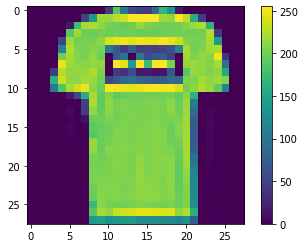

In [5]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

### Task 1:

Cross-validation is a method of checking performance of different methods on some subsamples of the training data to decide for a best performing model among a number of them under consideration. For the so-called $k$-fold crossvalidation, one splits the training data into $k$ equal sized portions using random sampling. One can utilize for the purpose the following random permutation function and Python list reshaping methods.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
perm=np.random.permutation(12)
print(perm)
rearr=perm.reshape(4, 3)
print(rearr)

[ 1  5  7  2  0 10  6  8  3  4 11  9]
[[ 1  5  7]
 [ 2  0 10]
 [ 6  8  3]
 [ 4 11  9]]


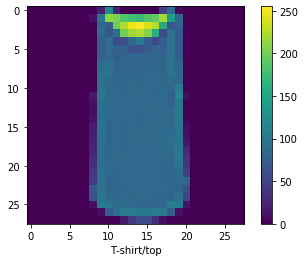

In [8]:
small_images=train_images[rearr]
small_labels=train_labels[rearr]
plt.figure()
plt.imshow(small_images[1][0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[small_labels[1][0]])
plt.show()

Thus rearrangement to 10 batches of the training data could start with the following command.

In [9]:
perm=np.random.permutation(60000)
rearr=perm.reshape(10,6000)

In [10]:
CV_images=train_images[rearr]
CV_labels=train_labels[rearr]
len(CV_images[0])

6000

#### Further description of the data

The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [11]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [12]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [14]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [15]:
len(test_labels)

10000

#### Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

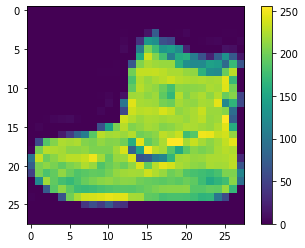

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

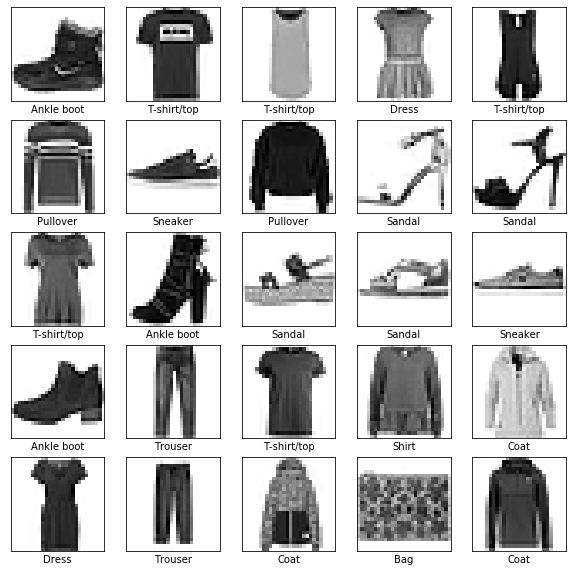

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
len(CV_images)

10

### Task 2:

Prepare ten cross-validation data sets for  the 10 fold cross validation method using the partition of the data obtained in Task 1. In each of the set you should have 90% data for the training and 10% for testing. 

In [35]:
CV_images=CV_images/255.0

There are many ways to prepare your data for cross-validation. One way is to use list *rearr* that one could use to create split randomly training set into ten equally sized parts. This commented code could be utilized in Task 1. 

In [36]:
#perm=np.random.permutation(60000)
#rearr=perm.reshape(10,6000)
#len(rearr)

Here is an example how a list with the cross-validation data could be created. For illustration, it is presented for a small size of the data (12 data points, with 3 splits, 4 data points for test in a validation step and 8 for training in such a validation step. 

In [95]:
perm1=np.random.permutation(12)
print(perm1)
rearr1=perm1.reshape(3,4)
print(rearr1)

[ 9  0  6  4  5 11  1 10  3  7  8  2]
[[ 9  0  6  4]
 [ 5 11  1 10]
 [ 3  7  8  2]]


In [96]:
CVin=[list(rearr1[0]),list(rearr1[1])]
print(CVin)
for k in range(1):
    CVin[1]=CVin[1]+list(rearr1[(k+2)%3])
CVin=[CVin]    
print(CVin)

[[9, 0, 6, 4], [5, 11, 1, 10]]
[[[9, 0, 6, 4], [5, 11, 1, 10, 3, 7, 8, 2]]]


In the above I use the reminder of division of an integer by an integer as illustrated in the next line.

In [97]:
5%3

2

Assuming that the first grouping for the cross-validation is constructed above. We go for construction of the remaining two. 

In [98]:
for i in range(2):
    C=[list(rearr1[i+1]),list(rearr1[(i+2)%3])]
    for k in range(1):
        C[1]=C[1]+list(rearr1[(i+3+k)%3])
    CVin=CVin+[C]
print(CVin)

[[[9, 0, 6, 4], [5, 11, 1, 10, 3, 7, 8, 2]], [[5, 11, 1, 10], [3, 7, 8, 2, 9, 0, 6, 4]], [[3, 7, 8, 2], [9, 0, 6, 4, 5, 11, 1, 10]]]


Once the indexes are defined in *CVin* subsampling from the data can be done as follows. The second testing CV data and the second training CV data are obtained in this simple example as follows.

In [99]:
testCVim=train_images[CVin[1][0]]
testCVlb=train_labels[CVin[1][0]]
len(testCVim)

4

In [100]:
trainCVim=train_images[CVin[1][1]]
trainCVlb=train_labels[CVin[1][1]]
len(trainCVim)

8

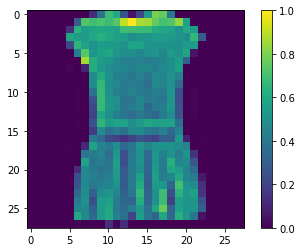

In [101]:
plt.figure()
plt.imshow(trainCVim[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [102]:
# importing time module  
import time  
  


In [118]:
a=time.time()  #To clock the performance

#We start with the first set for 10-fold validation

CVin=[list(rearr[0]),list(rearr[1])]
for k in range(8):
    CVin[1]=CVin[1]+list(rearr[(k+2)%10])
CVin=[CVin]   #Here the list is initiated with the first set in it 


#We turn to the next nine sets

for i in range(9):
    C=[list(rearr[i+1]),list(rearr[(i+2)%10])]
    for k in range(8):
        C[1]=C[1]+list(rearr[(i+3+k)%10])
    CVin=CVin+[C]
    
time.time()-a

0.05688786506652832

The following code is an alternative method as suggested by Mathias Johansson. It is very compact although a bit slower. 

In [116]:
a=time.time()  #To clock the performance




#   The first containing all the data from the scrambled, not in the current out

#   The second list is simply the outs.


k_fold = [([_ for _ in perm if _ not in out], out) for out in rearr]


    
time.time()-a

3.4306609630584717

In [104]:
print(len(CVin))
print(len(CVin[0]))
print(len(CVin[0][0]))
print(len(CVin[1][1]))


10
2
6000
54000


### Task 2:

Print images of the first picture in each of the ten batches created for the cross-validation purposes. 

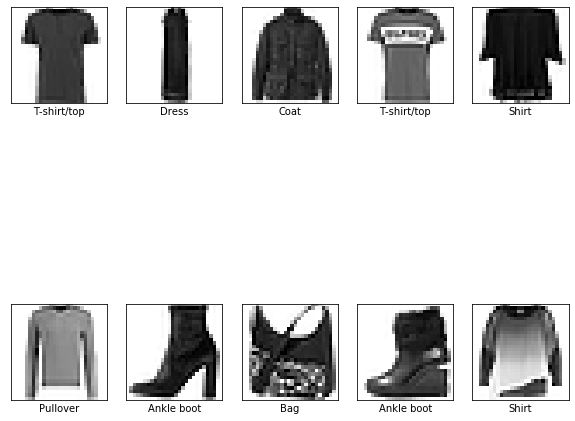

In [20]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(CV_images[i][1], cmap=plt.cm.binary)
    plt.xlabel(class_names[CV_labels[i][1]])
plt.show()

### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

#### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [21]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [23]:
model.fit(train_images, train_labels, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.5064 - accuracy: 0.8229
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3791 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3385 - accuracy: 0.8767
Epoch 4/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3136 - accuracy: 0.8843
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2959 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2804 - accuracy: 0.8958
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2670 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2581 - accuracy: 0.9044
Epoch 9/10
60000/60000 [===

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

#### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3441 - accuracy: 0.8827

Test accuracy: 0.8827


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

### Task 3:

Consider five other designs of neural networks that you would test on the above data set. In your design change the number of layers and the number of neuron per layer but preserve the total number of neurons.


#### Design No. 1


In [85]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(88, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [86]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Design No. 2


In [87]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(108, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [88]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Design No. 3


In [89]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(110, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [90]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Design No. 4


In [91]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(48, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])

In [92]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Design No. 5


In [93]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(58, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [94]:
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [105]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 88)                69080     
_________________________________________________________________
dense_20 (Dense)             (None, 40)                3560      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                410       
Total params: 73,050
Trainable params: 73,050
Non-trainable params: 0
_________________________________________________________________


In [107]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_23 (Dense)             (None, 108)               2268      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1090      
Total params: 19,058
Trainable params: 19,058
Non-trainable params: 0
_________________________________________________________________


In [108]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 110)               86350     
_________________________________________________________________
dense_26 (Dense)             (None, 18)                1998      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                190       
Total params: 88,538
Trainable params: 88,538
Non-trainable params: 0
_________________________________________________________________


In [109]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 48)                37680     
_________________________________________________________________
dense_29 (Dense)             (None, 40)                1960      
_________________________________________________________________
dense_30 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                410       
Total params: 41,690
Trainable params: 41,690
Non-trainable params: 0
_________________________________________________________________


In [110]:
model5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_33 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_34 (Dense)             (None, 58)                1218      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                590       
Total params: 42,078
Trainable params: 42,078
Non-trainable params: 0
_________________________________________________________________


### Task 5:

Use the 10 fold cross validation method to investigate the performance of the networks designed by you as well as the the one that was originally trained above (for the total of six networks). Select the one that based on the performed cross validation worked best. 

In [111]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset or a dataset iterator. Should re

In [129]:
a=0
for k in range(10):
    testCVim=train_images[CVin[k][0]]
    testCVlb=train_labels[CVin[k][0]]
    trainCVim=train_images[CVin[k][1]]
    trainCVlb=train_labels[CVin[k][1]]
    del model
#The following part of redfining the model is necessary since the values of the parameters are somehow remembered
#and the crossvalidation does not work. 

    model= keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
        ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#The end of redefining of the model

    model.fit(trainCVim, trainCVlb, epochs=10)
    test_loss, test_acc = model.evaluate(testCVim,  testCVlb, verbose=2)
    a=a+test_acc
accu=a/10
accu

Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 43us/sample - loss: 0.5080 - accuracy: 0.8214
Epoch 2/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.3853 - accuracy: 0.8607
Epoch 3/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.3426 - accuracy: 0.8759
Epoch 4/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.3200 - accuracy: 0.8822
Epoch 5/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2982 - accuracy: 0.8891
Epoch 6/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2842 - accuracy: 0.8944
Epoch 7/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2714 - accuracy: 0.9003
Epoch 8/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2586 - accuracy: 0.9036
Epoch 9/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2494 - accuracy: 0.9074
Epoch 10/10
54

0.8891500055789947

In [130]:
a1=0
for k in range(10):
    testCVim=train_images[CVin[k][0]]
    testCVlb=train_labels[CVin[k][0]]
    trainCVim=train_images[CVin[k][1]]
    trainCVlb=train_labels[CVin[k][1]]
    model1 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(88, activation='relu'),
        keras.layers.Dense(40, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
        ])
    model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model1.fit(trainCVim, trainCVlb, epochs=10)
    test_loss, test_acc = model1.evaluate(testCVim,  testCVlb, verbose=2)
    a1=a1+test_acc
a1/10
accu1=a1/10
accu1

Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 51us/sample - loss: 0.5187 - accuracy: 0.8168
Epoch 2/10
54000/54000 [==============================] - 2s 42us/sample - loss: 0.3796 - accuracy: 0.8636
Epoch 3/10
54000/54000 [==============================] - 2s 43us/sample - loss: 0.3452 - accuracy: 0.8734
Epoch 4/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.3214 - accuracy: 0.8817
Epoch 5/10
54000/54000 [==============================] - 2s 39us/sample - loss: 0.3050 - accuracy: 0.8873
Epoch 6/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2934 - accuracy: 0.8914
Epoch 7/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2763 - accuracy: 0.8979
Epoch 8/10
54000/54000 [==============================] - 2s 44us/sample - loss: 0.2694 - accuracy: 0.8998
Epoch 9/10
54000/54000 [==============================] - 3s 58us/sample - loss: 0.2601 - accuracy: 0.9023
Epoch 10/10
54

0.8855166673660279

In [131]:
a2=0
a3=0
a4=0
a5=0
for k in range(10):
    testCVim=train_images[CVin[k][0]]
    testCVlb=train_labels[CVin[k][0]]
    trainCVim=train_images[CVin[k][1]]
    trainCVlb=train_labels[CVin[k][1]]
    model2 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(108, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
        ])
    
    model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model2.fit(trainCVim, trainCVlb, epochs=10)
    test_loss, test_acc = model2.evaluate(testCVim,  testCVlb, verbose=2)
    a2=a2+test_acc

    model3 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(110, activation='relu'),
        keras.layers.Dense(18, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
        ])
    model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model3.fit(trainCVim, trainCVlb, epochs=10)
    test_loss, test_acc = model3.evaluate(testCVim,  testCVlb, verbose=2)
    a3=a3+test_acc
    
        
    model4 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(48, activation='relu'),
        keras.layers.Dense(40, activation='relu'),
        keras.layers.Dense(40, activation='relu'),
        keras.layers.Dense(10,activation='softmax'),
        ])
    model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model4.fit(trainCVim, trainCVlb, epochs=10)
    test_loss, test_acc = model4.evaluate(testCVim,  testCVlb, verbose=2)
    a4=a4+test_acc
    
    model5 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(58, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])
    model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model5.fit(trainCVim, trainCVlb, epochs=10)
    test_loss, test_acc = model5.evaluate(testCVim,  testCVlb, verbose=2)
    a5=a5+test_acc
accu2=a2/10
accu3=a3/10
accu4=a4/10
accu5=a5/10

Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 42us/sample - loss: 0.5579 - accuracy: 0.8040
Epoch 2/10
54000/54000 [==============================] - 2s 41us/sample - loss: 0.4079 - accuracy: 0.8528
Epoch 3/10
54000/54000 [==============================] - 2s 40us/sample - loss: 0.3758 - accuracy: 0.8637
Epoch 4/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.3535 - accuracy: 0.8713
Epoch 5/10
54000/54000 [==============================] - 2s 46us/sample - loss: 0.3380 - accuracy: 0.8776
Epoch 6/10
54000/54000 [==============================] - 2s 41us/sample - loss: 0.3269 - accuracy: 0.8794
Epoch 7/10
54000/54000 [==============================] - 2s 39us/sample - loss: 0.3143 - accuracy: 0.8836
Epoch 8/10
54000/54000 [==============================] - 2s 39us/sample - loss: 0.3067 - accuracy: 0.8861
Epoch 9/10
54000/54000 [==============================] - 2s 39us/sample - loss: 0.2976 - accuracy: 0.8903
Epoch 10/10
54

Epoch 2/10
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3955 - accuracy: 0.8552
Epoch 3/10
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3644 - accuracy: 0.8654
Epoch 4/10
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3385 - accuracy: 0.8752
Epoch 5/10
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3235 - accuracy: 0.8814
Epoch 6/10
54000/54000 [==============================] - 2s 34us/sample - loss: 0.3101 - accuracy: 0.8862
Epoch 7/10
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2991 - accuracy: 0.8879
Epoch 8/10
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2900 - accuracy: 0.8922
Epoch 9/10
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2823 - accuracy: 0.8935
Epoch 10/10
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2753 - accuracy: 0.8971
6000/6000 - 0s - loss: 0.3404 - accu

54000/54000 [==============================] - 2s 41us/sample - loss: 0.3410 - accuracy: 0.8754
Epoch 4/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.3160 - accuracy: 0.8834
Epoch 5/10
54000/54000 [==============================] - 3s 50us/sample - loss: 0.3012 - accuracy: 0.8887
Epoch 6/10
54000/54000 [==============================] - 3s 48us/sample - loss: 0.2859 - accuracy: 0.8947
Epoch 7/10
54000/54000 [==============================] - 2s 46us/sample - loss: 0.2759 - accuracy: 0.8976s - l
Epoch 8/10
54000/54000 [==============================] - 2s 45us/sample - loss: 0.2637 - accuracy: 0.9030
Epoch 9/10
54000/54000 [==============================] - 2s 46us/sample - loss: 0.2547 - accuracy: 0.9047
Epoch 10/10
54000/54000 [==============================] - 2s 46us/sample - loss: 0.2456 - accuracy: 0.9078
6000/6000 - 0s - loss: 0.3329 - accuracy: 0.8805
Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 41us/sample - lo

54000/54000 [==============================] - 3s 53us/sample - loss: 0.3421 - accuracy: 0.8739
Epoch 5/10
54000/54000 [==============================] - 3s 55us/sample - loss: 0.3294 - accuracy: 0.8791
Epoch 6/10
54000/54000 [==============================] - 3s 51us/sample - loss: 0.3129 - accuracy: 0.8856
Epoch 7/10
54000/54000 [==============================] - 3s 56us/sample - loss: 0.3017 - accuracy: 0.8886
Epoch 8/10
54000/54000 [==============================] - 3s 55us/sample - loss: 0.2912 - accuracy: 0.8919
Epoch 9/10
54000/54000 [==============================] - 3s 57us/sample - loss: 0.2838 - accuracy: 0.8945
Epoch 10/10
54000/54000 [==============================] - 3s 52us/sample - loss: 0.2761 - accuracy: 0.8958s - loss: 0.2756 - accuracy: 0.
6000/6000 - 0s - loss: 0.3470 - accuracy: 0.8790
Train on 54000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 48us/sample - loss: 0.5452 - accuracy: 0.8067s - ETA: 
Epoch 2/10
54000/54000 [==================

In [132]:
print(accu)
print(accu1)
print(accu2)
print(accu3)
print(accu4)
print(accu5)

0.8891500055789947
0.8855166673660279
0.8778833389282227
0.8854166746139527
0.8796333312988281
0.8798666596412659


Based on the printed the cross-validation errors, we see that all models perform similarily but the original model is still the best. The first and the third are performing also quite good and thy have fewer parameters the the original one. Finally, the second model performed the worst but it also had the fewest number of the parametetrs. We take the first model and the second model to train it on the entire data set.

### Task 6:

Train the selected network on the entire training data. Then test its performance on the testing data set and summariaze the performance. 

In [133]:
model1.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2503 - accuracy: 0.9072
Epoch 2/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2396 - accuracy: 0.9107
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2337 - accuracy: 0.9123
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2254 - accuracy: 0.9154
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2190 - accuracy: 0.9176
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2138 - accuracy: 0.9194
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2092 - accuracy: 0.9210
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2030 - accuracy: 0.9233
Epoch 9/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1995 - accuracy: 0.9247
Epoch 10/10
60

In [134]:
model2.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2892 - accuracy: 0.8918
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2816 - accuracy: 0.8955
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2777 - accuracy: 0.8956
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2726 - accuracy: 0.8974
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2658 - accuracy: 0.9005
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2612 - accuracy: 0.9017
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2580 - accuracy: 0.9022
Epoch 8/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2529 - accuracy: 0.9055
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2496 - accuracy: 0.9059
Epoch 10/10
60

Then we want to test these two models to see how they perform on the testing data set.

In [135]:
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3835 - accuracy: 0.8822

Test accuracy: 0.8822


In [136]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3443 - accuracy: 0.8797

Test accuracy: 0.8797


In [137]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3549 - accuracy: 0.8743

Test accuracy: 0.8743


We see that the original model tests a bit worse than our  best model but better than the model with the fewest number of parameters. 

### Task 7: 
With the models trained, you can use them to make predictions about some images. Below you see a discussion of predictions based on the original model. Please, complement it with an analogous discussion for the best model out of five you have trained in the cross-validation. 

In [138]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [139]:
predictions[0]

array([1.0339978e-08, 5.3187009e-08, 6.8326883e-10, 1.4187308e-08,
       1.7782453e-08, 2.7883397e-03, 1.9271080e-07, 2.4621353e-02,
       2.4299928e-07, 9.7258973e-01], dtype=float32)

In [140]:
predictions1 = model1.predict(test_images)
predictions1[0]

array([1.6504488e-05, 3.7630855e-07, 7.8345756e-06, 2.7166999e-08,
       3.6828367e-09, 2.5711462e-04, 3.8802071e-05, 4.2970732e-02,
       3.1457578e-08, 9.5670867e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [55]:
np.argmax(predictions[0])

9

In [56]:
np.argmax(predictions1[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [57]:
test_labels[0]

9

Graph this to inspect the full set of 10 class predictions.

In [141]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

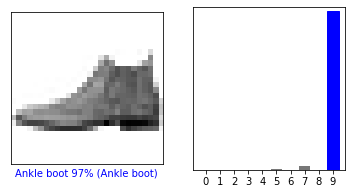

In [142]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [143]:
predictions1[0]

array([1.6504488e-05, 3.7630855e-07, 7.8345756e-06, 2.7166999e-08,
       3.6828367e-09, 2.5711462e-04, 3.8802071e-05, 4.2970732e-02,
       3.1457578e-08, 9.5670867e-01], dtype=float32)

In [144]:
predictions[0]

array([1.0339978e-08, 5.3187009e-08, 6.8326883e-10, 1.4187308e-08,
       1.7782453e-08, 2.7883397e-03, 1.9271080e-07, 2.4621353e-02,
       2.4299928e-07, 9.7258973e-01], dtype=float32)

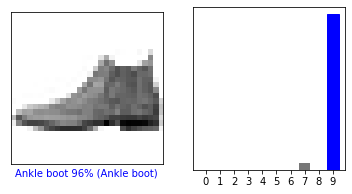

In [145]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

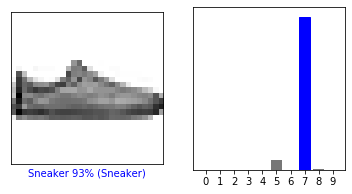

In [146]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

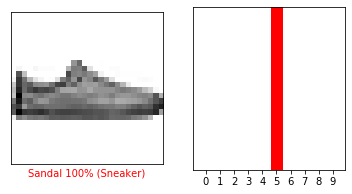

In [147]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

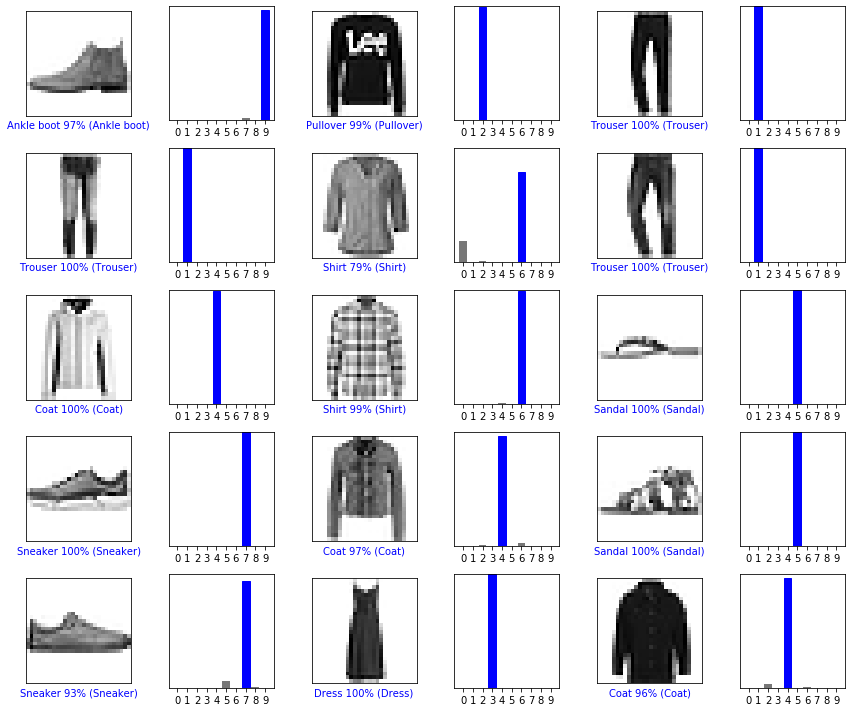

In [148]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

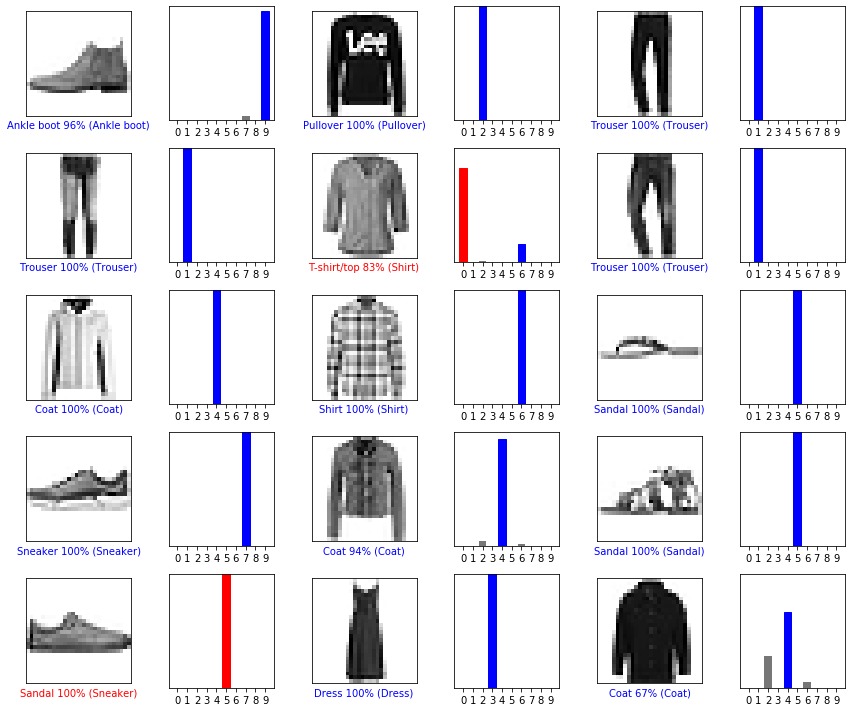

In [149]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions1[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions1[i], test_labels)
plt.tight_layout()
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [150]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [151]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [152]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.93260595e-05 1.14486405e-14 9.94503856e-01 6.28385566e-10
  1.83882692e-03 3.15179943e-14 3.60794598e-03 1.72902686e-15
  4.85506904e-12 8.56386056e-12]]


In [153]:
predictions1_single = model1.predict(img)

print(predictions1_single)

[[1.4313265e-04 1.4931392e-10 9.9922907e-01 1.1778785e-07 4.7647959e-04
  1.0606470e-15 1.5121023e-04 3.6128388e-11 1.7650889e-10 7.3059440e-16]]


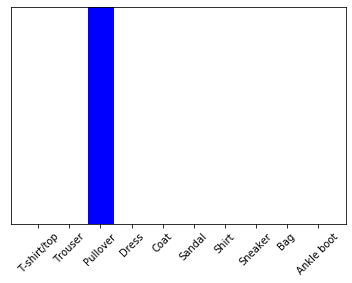

In [71]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

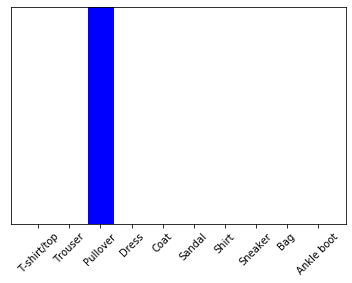

In [154]:
plot_value_array(1, predictions1_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [155]:
np.argmax(predictions_single[0])

2

In [156]:
np.argmax(predictions1_single[0])

2

And the models predict a label as expected.